The core packages used are re, gensim, spacy and pyLDAvis. 
Besides this we will also using matplotlib, numpy and pandas for data handling and visualization. 
Let’s import them.

In [1]:
# import libraries  
import numpy as np
import pandas as pd
import nltk
import re, random, os
import string, pprint
import matplotlib.pyplot as plt
import seaborn as sns

# spacy for basic preprocessing, optional, can use nltk as well (lemmatisation etc.)
import spacy

# gensim for LDA 
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
#from pyLDAvis import gensim_models as pg
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

What does LDA do?

LDA’s approach to topic modeling is it considers each document as a collection of topics in a certain proportion. 
And each topic as a collection of keywords, again, in a certain proportion.

Once you provide the algorithm with the number of topics, 
all it does it to rearrange the topics distribution within the documents and keywords 
distribution within the topics to obtain a good composition of topic-keywords distribution.

In [2]:
df = pd.read_csv("C:\\Users\\Soham Mohirre\\Desktop\\Projects\\7817_1.csv\\7817_1.csv")

print(df.shape)
df.head()

(1597, 27)


,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [3]:
DFrame = df.copy()

In [4]:
Product_Key = pd.DataFrame(DFrame,columns=['asins','keys'])
print(Product_Key)

           asins                                               keys
0     B00QJDU3KY                        kindlepaperwhite/b00qjdu3ky
1     B00QJDU3KY                        kindlepaperwhite/b00qjdu3ky
2     B00QJDU3KY                        kindlepaperwhite/b00qjdu3ky
3     B00QJDU3KY                        kindlepaperwhite/b00qjdu3ky
4     B00QJDU3KY                        kindlepaperwhite/b00qjdu3ky
...          ...                                                ...
1592  B00NO8JJZW  alexavoiceremoteforamazonfiretvfiretvstick/b00...
1593  B00NO8JJZW  alexavoiceremoteforamazonfiretvfiretvstick/b00...
1594  B00NO8JJZW  alexavoiceremoteforamazonfiretvfiretvstick/b00...
1595  B00NO8JJZW  alexavoiceremoteforamazonfiretvfiretvstick/b00...
1596  B00NO8JJZW  alexavoiceremoteforamazonfiretvfiretvstick/b00...

[1597 rows x 2 columns]


In [5]:
Prd_df = pd.DataFrame(Product_Key)

In [6]:
Prd_df

,asins,keys
0,B00QJDU3KY,kindlepaperwhite/b00qjdu3ky
1,B00QJDU3KY,kindlepaperwhite/b00qjdu3ky
2,B00QJDU3KY,kindlepaperwhite/b00qjdu3ky
3,B00QJDU3KY,kindlepaperwhite/b00qjdu3ky
4,B00QJDU3KY,kindlepaperwhite/b00qjdu3ky
...,...,...
1592,B00NO8JJZW,alexavoiceremoteforamazonfiretvfiretvstick/b00...
1593,B00NO8JJZW,alexavoiceremoteforamazonfiretvfiretvstick/b00...
1594,B00NO8JJZW,alexavoiceremoteforamazonfiretvfiretvstick/b00...
1595,B00NO8JJZW,alexavoiceremoteforamazonfiretvfiretvstick/b00...


In [7]:
df2 = pd.unique(DFrame[['asins', 'keys']].values.ravel())
print(df2)

['B00QJDU3KY' 'kindlepaperwhite/b00qjdu3ky' 'B002Y27P3M'
 'kindlekeyboard/b002y27p3m,amazon/d01101' 'B00DU15MU4'
 '848719035551,0848719035551,certifiedrefurbishedamazonfiretvpreviousgeneration1st/b00du15mu4'
 'B01LW1MS9C'
 'amazonechodotcasefitsechodot2ndgenerationonlyindigofabric/b01lw1ms9c'
 'B01FWSVGQQ' 'amazontapslingcovertangerine/b01fwsvgqq' 'B00DOPNLJ0'
 'kindlefirehdx89/b00dopnlj0'
 'amazonechodotcasefitsechodot2ndgenerationonlysaddletanleather/b01lw1ms9c'
 'amazontapslingcoverblue/b01fwsvgqq'
 'amazonechodotcasefitsechodot2ndgenerationonlysandstonefabric/b01lw1ms9c'
 'B00NO8LX7E' 'allnewamazonfiretvgamecontroller/b00no8lx7e' 'B00LWHUAF0'
 'firehd7tablet/b00lwhuaf0' 'amazonfiretvgamecontroller/b00no8lx7e'
 'amazontapslingcoverwhite/b01fwsvgqq'
 'amazontapslingcovermagenta/b01fwsvgqq' 'B00KDRQEYQ'
 'certifiedrefurbishedkindleereader/b00kdrqeyq'
 'amazontapslingcovergreen/b01fwsvgqq' 'B00OQVZDJM'
 'kindlepaperwhiteereaderblack/b00oqvzdjm' 'B00QJDVBFU'
 'kindlepaperwhite3g/b00qjdv

In [8]:
data = Prd_df
data.dropna(inplace = True)
sub ='echodot'
data["Indexes"]= data["keys"].str.find(sub)


In [9]:
data.drop_duplicates(inplace=False)

#pd.set_option("display.max_rows", None, "display.max_columns", None)
#print(data.drop_duplicates(inplace=False))


,asins,keys,Indexes
0,B00QJDU3KY,kindlepaperwhite/b00qjdu3ky,-1
23,B002Y27P3M,"kindlekeyboard/b002y27p3m,amazon/d01101",-1
55,B00DU15MU4,"848719035551,0848719035551,certifiedrefurbishe...",-1
93,B01LW1MS9C,amazonechodotcasefitsechodot2ndgenerationonlyi...,6
103,B01FWSVGQQ,amazontapslingcovertangerine/b01fwsvgqq,-1
...,...,...,...
1413,B01HC1S9HU,amazonkindleoasispremiumleatherbatterycoverwal...,-1
1425,B01HC1S9HU,amazonkindleoasispremiumleatherbatterycoverbla...,-1
1435,B00HX0SRXW,"amazonpremiumheadphones/b00hx0srxw,08487190395...",-1
1568,B00LORGAG6,replacementremoteforamazonfiretvstick/b00lorga...,-1


In [10]:
# filter for product id = amazon speaker
df = df[df['asins']== "B01BH83OOM"]
print(df.shape)
df.head()

(542, 27)


,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
852,AVpfpK8KLJeJML43BCuD,B01BH83OOM,Amazon,"Amazon Devices,Home,Smart Home & Connected Liv...",Black,2017-01-04T03:51:17Z,2017-08-13T08:31:07Z,4.8 in x 6.6 in x 3.2 in,8.416670e+11,amazontapalexaenabledportablebluetoothspeaker/...,...,5.0,"https://www.amazon.com/dp/B01BH83OOM,https://w...",IMPORTANT UPDATE (3/8/17): As you read my orig...,"The Echo's Little Sister Is AMAZING!! 3,",NaN,NaN,Deanokat,NaN,8.416670e+11,1.75 lbs
853,AVpfpK8KLJeJML43BCuD,B01BH83OOM,Amazon,"Amazon Devices,Home,Smart Home & Connected Liv...",Black,2017-01-04T03:51:17Z,2017-08-13T08:31:07Z,4.8 in x 6.6 in x 3.2 in,8.416670e+11,amazontapalexaenabledportablebluetoothspeaker/...,...,5.0,"https://www.amazon.com/dp/B01BH83OOM,https://w...",It was just a few weeks ago that I was bemoani...,Tap Alexa on the go!,NaN,NaN,Heather A,NaN,8.416670e+11,1.75 lbs
854,AVpfpK8KLJeJML43BCuD,B01BH83OOM,Amazon,"Amazon Devices,Home,Smart Home & Connected Liv...",Black,2017-01-04T03:51:17Z,2017-08-13T08:31:07Z,4.8 in x 6.6 in x 3.2 in,8.416670e+11,amazontapalexaenabledportablebluetoothspeaker/...,...,5.0,"https://www.amazon.com/dp/B01BH83OOM,https://w...",The Amazon Tap is a portable Bluetooth speaker...,Amazon Tap Review - Best Bluetooth Speaker in ...,NaN,NaN,Quentin Moore,NaN,8.416670e+11,1.75 lbs
855,AVpfpK8KLJeJML43BCuD,B01BH83OOM,Amazon,"Amazon Devices,Home,Smart Home & Connected Liv...",Black,2017-01-04T03:51:17Z,2017-08-13T08:31:07Z,4.8 in x 6.6 in x 3.2 in,8.416670e+11,amazontapalexaenabledportablebluetoothspeaker/...,...,5.0,http://reviews.bestbuy.com/3545/5097300/review...,Look at this product as a portable speaker fir...,Great for what it does,NaN,NaN,Casey,NaN,8.416670e+11,1.75 lbs
856,AVpfpK8KLJeJML43BCuD,B01BH83OOM,Amazon,"Amazon Devices,Home,Smart Home & Connected Liv...",Black,2017-01-04T03:51:17Z,2017-08-13T08:31:07Z,4.8 in x 6.6 in x 3.2 in,8.416670e+11,amazontapalexaenabledportablebluetoothspeaker/...,...,5.0,http://reviews.bestbuy.com/3545/5097300/review...,This Amazon tap is not only a great Bluetooth ...,"Awesome, smart little portable speaker",NaN,NaN,Tazman3582,NaN,8.416670e+11,1.75 lbs


In [11]:
# tokenize using gensim simple_preprocess
def sent_to_words(sentences, deacc=True): # deacc=True removes punctuations
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence)))  


# convert to list
data = df['reviews.text'].values.tolist()
data_words = list(sent_to_words(data))

# sample
print(data_words[3])

['look', 'at', 'this', 'product', 'as', 'portable', 'speaker', 'first', 'and', 'an', 'echo', 'replacement', 'second', 'the', 'big', 'reason', 'to', 'buy', 'this', 'over', 'standard', 'bluetooth', 'speakers', 'is', 'this', 'has', 'wifi', 'streaming', 'enabled', 'when', 'you', 'are', 'at', 'home', 'you', 'can', 'stream', 'music', 'with', 'ease', 'to', 'it', 'voice', 'recognition', 'is', 'top', 'notch', 'and', 'it', 'really', 'shines', 'when', 'using', 'it', 'with', 'other', 'smart', 'home', 'accessories', 'the', 'only', 'problem', 'is', 'having', 'to', 'tap', 'the', 'microphone', 'button', 'for', 'it', 'to', 'listen', 'to', 'your', 'voice', 'if', 'you', 'want', 'bigger', 'sound', 'and', 'always', 'listening', 'features', 'spend', 'the', 'extra', 'money', 'on', 'the', 'amazon', 'echo']


In [12]:
# tokenization using .split(), re.split() can be done find why its not done here 


In [13]:
# create list of stop words
# string.punctuation (from the 'string' module) contains a list of punctuations
#import nltk
#nltk.download('stopwords') Use import and download command to download 'stopword'
 
from nltk.corpus import stopwords
stop_words = stopwords.words('english') + list(string.punctuation)

In [14]:
# functions for removing stopwords and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [15]:
# call functions

# remove stop words
data_words_nostops = remove_stopwords(data_words)

# initialize spacy 'en' model, use only tagger since we don't need parsing or NER 
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_nostops, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[3])

['look', 'product', 'portable', 'speaker', 'replacement', 'second', 'big', 'reason', 'buy', 'standard', 'bluetooth', 'speaker', 'wifi', 'streaming', 'enable', 'home', 'stream', 'music', 'ease', 'voice', 'recognition', 'top', 'notch', 'really', 'shine', 'use', 'smart', 'home', 'accessory', 'problem', 'tap', 'microphone', 'button', 'listen', 'voice', 'want', 'big', 'sound', 'always', 'listen', 'feature', 'spend', 'extra', 'money', 'amazon', 'echo']


In [16]:
# If an error occurs while running call function from spacy package use below command is anaconda terminal 
# python -m spacy download en_core_web_lg
# python -m spacy download en_core_web_sm

# To resolve linkage error use command below in anaconda terminal
# python3 -m spacy download en

In [17]:
# compare the nostop, lemmatised version with the original one
# note that speakers is lemmatised to speaker; 
print(' '.join(data_words[3]), '\n')
print(' '.join(data_lemmatized[3]))

look at this product as portable speaker first and an echo replacement second the big reason to buy this over standard bluetooth speakers is this has wifi streaming enabled when you are at home you can stream music with ease to it voice recognition is top notch and it really shines when using it with other smart home accessories the only problem is having to tap the microphone button for it to listen to your voice if you want bigger sound and always listening features spend the extra money on the amazon echo 

look product portable speaker replacement second big reason buy standard bluetooth speaker wifi streaming enable home stream music ease voice recognition top notch really shine use smart home accessory problem tap microphone button listen voice want big sound always listen feature spend extra money amazon echo


In [18]:
# create dictionary and corpus

# create dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create corpus
corpus = [id2word.doc2bow(text) for text in data_lemmatized]

# sample
print(corpus[3])

[(3, 1), (13, 1), (28, 1), (30, 1), (56, 1), (60, 1), (82, 1), (84, 1), (85, 1), (97, 1), (98, 2), (99, 1), (115, 1), (118, 2), (137, 1), (146, 1), (153, 1), (177, 2), (187, 1), (190, 1), (197, 2), (200, 1), (215, 1), (216, 2), (217, 1), (218, 1), (219, 1), (220, 1), (221, 1), (222, 1), (223, 1), (224, 1), (225, 1), (226, 1), (227, 1), (228, 1), (229, 1), (230, 1), (231, 1), (232, 1), (233, 1)]


In [19]:
# human-readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[3:4]]

[[('amazon', 1),
  ('buy', 1),
  ('echo', 1),
  ('enable', 1),
  ('microphone', 1),
  ('music', 1),
  ('sound', 1),
  ('stream', 1),
  ('tap', 1),
  ('use', 1),
  ('voice', 2),
  ('want', 1),
  ('feature', 1),
  ('home', 2),
  ('smart', 1),
  ('always', 1),
  ('button', 1),
  ('listen', 2),
  ('portable', 1),
  ('product', 1),
  ('speaker', 2),
  ('streaming', 1),
  ('accessory', 1),
  ('big', 2),
  ('bluetooth', 1),
  ('ease', 1),
  ('extra', 1),
  ('look', 1),
  ('money', 1),
  ('notch', 1),
  ('problem', 1),
  ('really', 1),
  ('reason', 1),
  ('recognition', 1),
  ('replacement', 1),
  ('second', 1),
  ('shine', 1),
  ('spend', 1),
  ('standard', 1),
  ('top', 1),
  ('wifi', 1)]]

In [20]:
# Building a Model

In [21]:
# Build LDA model

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [22]:
# print the 10 topics
pprint.pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.061*"work" + 0.054*"great" + 0.039*"tap" + 0.025*"add" + 0.024*"get" + '
  '0.023*"make" + 0.022*"buy" + 0.021*"need" + 0.020*"music" + '
  '0.019*"feature"'),
 (1,
  '0.050*"music" + 0.044*"set" + 0.033*"little" + 0.024*"wireless" + '
  '0.023*"purchase" + 0.021*"like" + 0.020*"play" + 0.020*"favorite" + '
  '0.019*"portability" + 0.019*"learn"'),
 (2,
  '0.059*"get" + 0.032*"music" + 0.029*"echo" + 0.029*"tap" + 0.021*"weather" '
  '+ 0.020*"dot" + 0.020*"talk" + 0.019*"item" + 0.017*"loud" + 0.017*"day"'),
 (3,
  '0.085*"speaker" + 0.078*"great" + 0.067*"sound" + 0.059*"use" + '
  '0.043*"love" + 0.030*"easy" + 0.025*"quality" + 0.024*"connect" + '
  '0.022*"music" + 0.021*"bluetooth"'),
 (4,
  '0.032*"carry" + 0.028*"volume" + 0.021*"return" + 0.020*"mostly" + '
  '0.020*"office" + 0.020*"ask" + 0.020*"fun" + 0.020*"command" + '
  '0.019*"super" + 0.018*"tell"'),
 (5,
  '0.090*"good" + 0.068*"sound" + 0.036*"really" + 0.032*"quality" + '
  '0.026*"echo" + 0.023*"outside" 

In [23]:
# coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3858043158210208


In [24]:
# visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

C:\Users\Soham Mohirre\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.257483  0.081991       1        1  23.691175
9     -0.088825 -0.182178       2        1  15.715788
2      0.075207 -0.076756       3        1  10.997681
7     -0.041119  0.207642       4        1  10.740479
0     -0.093154 -0.077501       5        1   9.917923
8      0.011095 -0.026983       6        1   9.296926
5     -0.088564 -0.042782       7        1   6.029245
1      0.109246  0.195353       8        1   5.857127
4      0.205723  0.010975       9        1   3.989510
6      0.167875 -0.089760      10        1   3.764147, topic_info=        Term        Freq       Total Category  logprob  loglift
197  speaker  196.000000  196.000000  Default  30.0000  30.0000
82     sound  199.000000  199.000000  Default  29.0000  29.0000
169    great  223.000000  223.000000  Default  28.0000  28.0000
168     good  113.000000  113.000000  Default  27.0000  27.0000
97       use  186.000000  186.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
45      keep    2.841009   12.987500  Topic10  -4.7501   1.7598
37       get    2.614168  100.805182  Topic10  -4.8334  -0.3726
91      time    2.480952   56.003774  Topic10  -4.8857   0.1629
77       set    2.339238   34.897862  Topic10  -4.9445   0.5770
99      want    2.282369   51.120526  Topic10  -4.9691   0.1707

[529 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
103       1  0.869044     ability
103       6  0.079004     ability
283       1  0.576692        able
283       5  0.401177        able
430       4  0.835524  absolutely
...     ...       ...         ...
596      10  0.915516     working
1330      9  0.777017   worldwide
314       1  0.950214       worth
611       9  0.899938        yard
690       8  0.778255         yet

[633 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 10, 3, 8, 1, 9, 6, 2, 5, 7])

In [25]:
# Hyper parameter Tuning

In [26]:
# compute coherence value at various values of alpha and num_topics
def compute_coherence_values(dictionary, corpus, texts, num_topics_range, alpha_range):
    
    coherence_values = []
    model_list = []
    for alpha in alpha_range:
        for num_topics in num_topics_range:
            lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=dictionary,
                                               num_topics=num_topics, 
                                               alpha=alpha,
                                               per_word_topics=True)
            model_list.append(lda_model)
            coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
            coherence_values.append((alpha, num_topics, coherencemodel.get_coherence()))
        

    return model_list, coherence_values

In [27]:
# build models across a range of num_topics and alpha
num_topics_range = [2, 6, 10, 15, 20]
alpha_range = [0.01, 0.1, 1]
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatized, 
                                                        num_topics_range=num_topics_range, 
                                                        alpha_range=alpha_range)

In [28]:
coherence_df = pd.DataFrame(coherence_values, columns=['alpha', 'num_topics', 'coherence_value'])
coherence_df

,alpha,num_topics,coherence_value
0,0.01,2,0.480957
1,0.01,6,0.434463
2,0.01,10,0.414294
3,0.01,15,0.415125
4,0.01,20,0.396405
5,0.10,2,0.439464
6,0.10,6,0.417879
7,0.10,10,0.419868
8,0.10,15,0.399978
9,0.10,20,0.386887


In [29]:
coherence_df.sort_values('coherence_value')

,alpha,num_topics,coherence_value
9,0.10,20,0.386887
4,0.01,20,0.396405
8,0.10,15,0.399978
2,0.01,10,0.414294
3,0.01,15,0.415125
6,0.10,6,0.417879
7,0.10,10,0.419868
1,0.01,6,0.434463
5,0.10,2,0.439464
11,1.00,6,0.463075


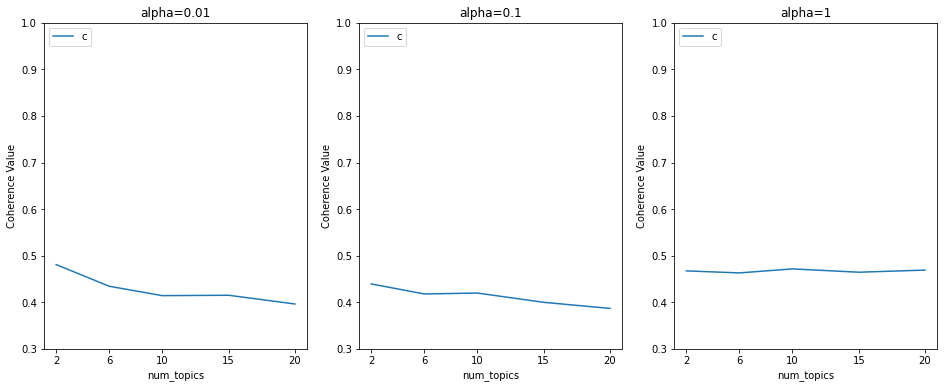

In [30]:
# plot
def plot_coherence(coherence_df, alpha_range, num_topics_range):
    plt.figure(figsize=(16,6))

    for i, val in enumerate(alpha_range):

        # subplot 1/3/i
        plt.subplot(1, 3, i+1)
        alpha_subset = coherence_df[coherence_df['alpha']==val]

        plt.plot(alpha_subset["num_topics"], alpha_subset["coherence_value"])
        plt.xlabel('num_topics')
        plt.ylabel('Coherence Value')
        plt.title("alpha={0}".format(val))
        plt.ylim([0.30, 1])
        plt.legend('coherence value', loc='upper left')
        plt.xticks(num_topics_range)

plot_coherence(coherence_df, alpha_range, num_topics_range)

In [31]:
# Finally building the LDA Model by selecting 

Final_LDA_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                  id2word=id2word,
                                                  num_topics=6,
                                                  random_state=100,
                                                  update_every=1,
                                                  chunksize=100,
                                                  passes=10,
                                                  alpha=1,
                                                  per_word_topics=True)

In [32]:
# print the 10 topics
pprint.pprint(Final_LDA_model.print_topics())
doc_lda = Final_LDA_model[corpus]

[(0,
  '0.115*"great" + 0.047*"buy" + 0.036*"product" + 0.023*"button" + '
  '0.019*"listen" + 0.019*"say" + 0.019*"want" + 0.018*"gift" + '
  '0.017*"portability" + 0.017*"time"'),
 (1,
  '0.062*"music" + 0.045*"love" + 0.041*"play" + 0.030*"ask" + 0.028*"amazon" '
  '+ 0.024*"question" + 0.021*"fun" + 0.018*"little" + 0.017*"work" + '
  '0.016*"really"'),
 (2,
  '0.116*"tap" + 0.047*"echo" + 0.027*"make" + 0.019*"get" + 0.018*"voice" + '
  '0.018*"talk" + 0.015*"small" + 0.015*"room" + 0.014*"activate" + '
  '0.013*"command"'),
 (3,
  '0.092*"use" + 0.064*"speaker" + 0.023*"device" + 0.022*"phone" + '
  '0.020*"bluetooth" + 0.020*"music" + 0.017*"wifi" + 0.016*"connect" + '
  '0.013*"stream" + 0.013*"get"'),
 (4,
  '0.096*"sound" + 0.041*"speaker" + 0.041*"easy" + 0.038*"quality" + '
  '0.033*"love" + 0.033*"portable" + 0.028*"good" + 0.024*"great" + '
  '0.021*"take" + 0.019*"work"'),
 (5,
  '0.034*"good" + 0.033*"need" + 0.033*"echo" + 0.030*"dot" + 0.028*"well" + '
  '0.027*"purch

In [33]:
# coherence score
coherence_model_lda = CoherenceModel(model=Final_LDA_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3757675480752509


In [34]:
# visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(Final_LDA_model, corpus, id2word)
vis

C:\Users\Soham Mohirre\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.122480 -0.016109       1        1  20.822629
2      0.048796  0.211170       2        1  17.440732
4     -0.184803 -0.059629       3        1  17.039721
0     -0.104931 -0.172753       4        1  16.390135
1      0.222987 -0.102519       5        1  14.916027
5     -0.104529  0.139840       6        1  13.390758, topic_info=         Term        Freq       Total Category  logprob  loglift
169     great  203.000000  203.000000  Default  30.0000  30.0000
85        tap  229.000000  229.000000  Default  29.0000  29.0000
97        use  183.000000  183.000000  Default  28.0000  28.0000
82      sound  181.000000  181.000000  Default  27.0000  27.0000
197   speaker  180.000000  180.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
145      also   11.972147   47.097226   Topic6  -4.5808   0.6410
187  portable   13.105983   75.351717   Topic6  -4.4903   0.2615
77        set   10.291136   34.561555   Topic6  -4.7321   0.7991
52       love   10.494329  142.247685   Topic6  -4.7125  -0.5961
335      work    9.634497   91.857034   Topic6  -4.7980  -0.2443

[339 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
103       2  0.091355  ability
103       3  0.913553  ability
283       1  0.337356     able
283       3  0.311406     able
283       4  0.337356     able
...     ...       ...      ...
335       4  0.261276     work
335       5  0.250389     work
335       6  0.108865     work
314       6  0.959109    worth
690       5  0.902607      yet

[431 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 5, 1, 2, 6])